# Pandas Exercise 3

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [5]:
titles['decades'] = titles.year // 10 * 10

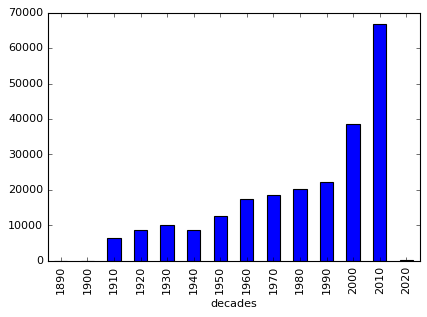

In [18]:
_ = titles.groupby(['decades']).size().plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

In [20]:
titles['decades'] = titles.year // 10 * 10
t = titles[titles.title == 'Hamlet']

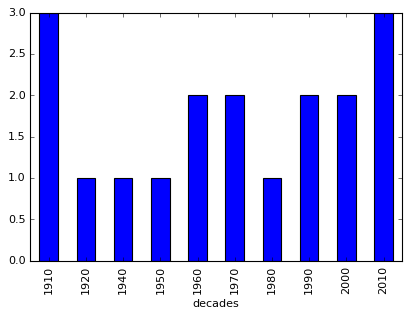

In [21]:
_ = t.groupby(['decades']).size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [9]:
cast['decades'] = cast.year // 10 * 10
t = cast[(cast.n == 1) & (cast.decades == 1950)]

In [10]:
t.groupby(['year','type']).size()

year  type   
1950  actor      621
      actress    279
1951  actor      647
      actress    279
1952  actor      606
      actress    291
1953  actor      652
      actress    300
1954  actor      634
      actress    308
1955  actor      639
      actress    281
1956  actor      642
      actress    304
1957  actor      734
      actress    301
1958  actor      704
      actress    293
1959  actor      720
      actress    317
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [11]:
cast['decades'] = cast.year // 10 * 10
c = cast[(cast.decades == 1950) & (cast.n <= 5) & (cast.n >= 1)]

In [12]:
c.groupby(['n','type']).size()

n    type   
1.0  actor      6599
     actress    2953
2.0  actor      4550
     actress    4544
3.0  actor      5575
     actress    3136
4.0  actor      5581
     actress    2838
5.0  actor      5597
     actress    2540
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [22]:
c = cast[cast.title == 'The Pink Panther']

In [14]:
c.sort('n').groupby(['year'])[['n']].max()

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,n
year,
1963,15.0
2006,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [15]:
data = cast[cast.name == 'Frank Oz'].groupby(['title', 'year']).size().reset_index()
data[data[0] > 1].sort('year')

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,title,year,0
22,The Muppet Movie,1979,8
0,An American Werewolf in London,1981,2
20,The Great Muppet Caper,1981,6
19,The Dark Crystal,1982,2
23,The Muppets Take Manhattan,1984,7
2,Follow That Bird,1985,3
21,The Muppet Christmas Carol,1992,7
7,Muppet Treasure Island,1996,4
8,Muppets from Space,1999,4
17,The Adventures of Elmo in Grouchland,1999,3


### List each of the characters that Frank Oz has portrayed at least twice.

In [16]:
data = cast[(cast.name == 'Frank Oz')].groupby(['character']).size().reset_index()

In [17]:
data[data[0] >= 2].sort(0)

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,character,0
15,Grover,2
2,Bert,3
5,Cookie Monster,3
10,Fozzie Bear,4
25,Sam the Eagle,5
0,Animal,6
18,Miss Piggy,6
34,Yoda,6
